In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% %matplotlib inline

# 【問題1】データセットの取得

In [3]:
df = pd.read_csv('./train.csv')

# 【問題2】データセット自体の調査

In [4]:
# データの個数確認
df.shape

(1460, 81)

住宅の価格に関するデータ。住宅価格の指標として「MSSubClass: Identifies the type of dwelling involved in the sale.」YearBuilt: Original construction date「」「HouseStyle: Style of dwelling」などの各データがあり、全体では1460行８１列ある。

# 【問題3】データの確認
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。

- 各特徴量がどういったものかを見る。（数値データか文字データなど）

In [5]:
# 各特徴量の形式を確認
pd.set_option('display.max_rows', 1000)
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


- 今回の目的変数はどの列か確認する。


In [6]:
df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 【問題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。

- 各特徴量の欠損値の有無を確認する。

In [8]:
df.isnull().apply(lambda col: col.value_counts(), axis=0).fillna(0).astype(np.int)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
False,1460,1460,1460,1201,1460,1460,91,1460,1460,1460,...,1460,7,281,54,1460,1460,1460,1460,1460,1460
True,0,0,0,259,0,0,1369,0,0,0,...,0,1453,1179,1406,0,0,0,0,0,0


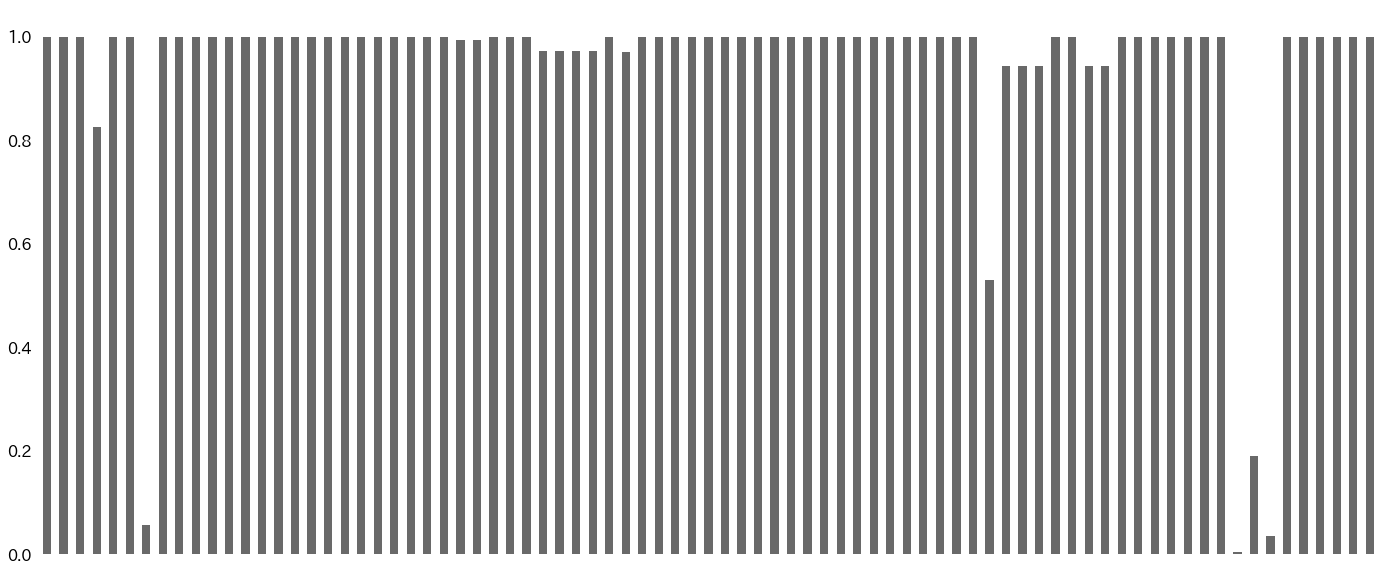

In [9]:
# missingnoライブラリ利用した確認方法
import missingno as msno
msno.bar(df.sample(1000));

- 欠損値が何パーセント含まれるかを確認する。

In [10]:
def null_resarch(df):
    for i in df.columns:
        print("・" + i )
        print("　　欠損率:" + str((df[i].isnull().sum()/len(df)*100).round(2)) + '%')
        
null_resarch(df)

・Id
　　欠損率:0.0%
・MSSubClass
　　欠損率:0.0%
・MSZoning
　　欠損率:0.0%
・LotFrontage
　　欠損率:17.74%
・LotArea
　　欠損率:0.0%
・Street
　　欠損率:0.0%
・Alley
　　欠損率:93.77%
・LotShape
　　欠損率:0.0%
・LandContour
　　欠損率:0.0%
・Utilities
　　欠損率:0.0%
・LotConfig
　　欠損率:0.0%
・LandSlope
　　欠損率:0.0%
・Neighborhood
　　欠損率:0.0%
・Condition1
　　欠損率:0.0%
・Condition2
　　欠損率:0.0%
・BldgType
　　欠損率:0.0%
・HouseStyle
　　欠損率:0.0%
・OverallQual
　　欠損率:0.0%
・OverallCond
　　欠損率:0.0%
・YearBuilt
　　欠損率:0.0%
・YearRemodAdd
　　欠損率:0.0%
・RoofStyle
　　欠損率:0.0%
・RoofMatl
　　欠損率:0.0%
・Exterior1st
　　欠損率:0.0%
・Exterior2nd
　　欠損率:0.0%
・MasVnrType
　　欠損率:0.55%
・MasVnrArea
　　欠損率:0.55%
・ExterQual
　　欠損率:0.0%
・ExterCond
　　欠損率:0.0%
・Foundation
　　欠損率:0.0%
・BsmtQual
　　欠損率:2.53%
・BsmtCond
　　欠損率:2.53%
・BsmtExposure
　　欠損率:2.6%
・BsmtFinType1
　　欠損率:2.53%
・BsmtFinSF1
　　欠損率:0.0%
・BsmtFinType2
　　欠損率:2.6%
・BsmtFinSF2
　　欠損率:0.0%
・BsmtUnfSF
　　欠損率:0.0%
・TotalBsmtSF
　　欠損率:0.0%
・Heating
　　欠損率:0.0%
・HeatingQC
　　欠損率:0.0%
・CentralAir
　　欠損率:0.0%
・Electrical
　　欠損率:0.07%
・1stFlrSF
　　欠損率:0.0%
・2ndFlr

- 5つ以上欠損値がある特徴量（列）は削除する

In [13]:
# 非欠損の値が1455つ未満の列の削除
df = df.dropna(thresh=1455,axis=1)
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


- 欠損値があるサンプル（行）は削除する。

In [125]:
# 欠損値含む行の削除
df = df.dropna()
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


# 【問題5】用語の調査

- 尖度

分布が正規分布からどれだけ尖っているかを表す統計量で、山の尖り度と裾の広がり度を示す。
正規分布より尖った分布（データが平均付近に集中し、分布の裾が重い）のときには正の値を、正規分布より扁平な分布（データが平均付近から散らばり、分布の裾が軽い）のときには負の値をとり。正規分布の場合には0になる。

- 歪度

分布が正規分布からどれだけ歪んでいるかを表す統計量で、左右対称性を示す指標のこと。
「右裾が長い」もしくは「右に歪んだ」もしくは「左に偏った」分布のときには正の値を、「左裾が長い」もしくは「左に歪んだ」もしくは「右に偏った」分布のときには負の値をとり。左右対称の分布（例えば正規分布）の場合には0になる。

# 【問題6】分布の確認

- seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。

/Users/katouyuuya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


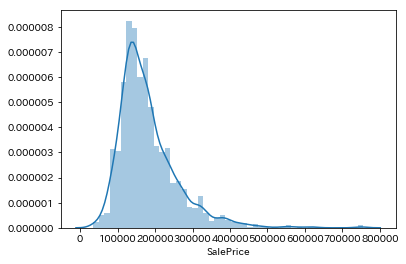

In [15]:
sns.distplot(df['SalePrice']);

In [16]:
print("歪度:", df['SalePrice'].skew())
print("尖度 :", df['SalePrice'].kurt())

歪度: 1.8828757597682129
尖度 : 6.536281860064529



- 目的変数に対して対数変換を行う。

/Users/katouyuuya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


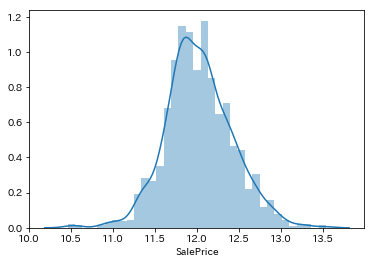

In [17]:
log_df_price = np.log(df['SalePrice'])
sns.distplot(log_df_price)

- 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

In [18]:
print("歪度:", log_df_price.skew())
print("尖度 :", log_df_price.kurt())

歪度: 0.12133506220520406
尖度 : 0.8095319958036296


[変化に関する考察]<br>
 対数変換前のデータの分布を見ると「左に偏り」「大きく尖っている」事がわかる。目的変数を対数変換すると、データの分布が正規分布に近づいた事がわかり歪度・尖度も０に近づいている。

# 【問題7】相関係数の確認

特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。

- 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。

In [19]:
df_corr = df.corr()
print(df_corr)

                     Id  MSSubClass   LotArea  OverallQual  OverallCond  \
Id             1.000000    0.011156 -0.033226    -0.028365     0.012609   
MSSubClass     0.011156    1.000000 -0.139781     0.032628    -0.059316   
LotArea       -0.033226   -0.139781  1.000000     0.105806    -0.005636   
OverallQual   -0.028365    0.032628  0.105806     1.000000    -0.091932   
OverallCond    0.012609   -0.059316 -0.005636    -0.091932     1.000000   
YearBuilt     -0.012713    0.027850  0.014228     0.572323    -0.375983   
YearRemodAdd  -0.021998    0.040581  0.013788     0.550684     0.073741   
BsmtFinSF1    -0.005024   -0.069836  0.214103     0.239666    -0.046231   
BsmtFinSF2    -0.005968   -0.065649  0.111170    -0.059119     0.040229   
BsmtUnfSF     -0.007940   -0.140759 -0.002618     0.308159    -0.136841   
TotalBsmtSF   -0.015415   -0.238518  0.260833     0.537808    -0.171098   
1stFlrSF       0.010496   -0.251758  0.299475     0.476224    -0.144203   
2ndFlrSF       0.005590  

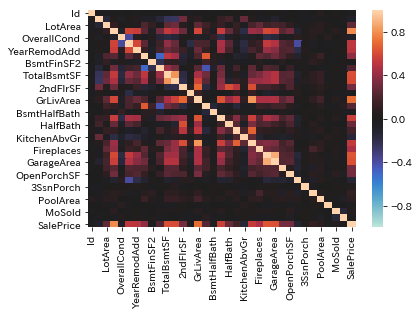

In [20]:
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0)
plt.show();

[考察]<br>
相関係数とヒートマップから、正の相関関係で高い数値を出ているものを選択できそうだと感じたため、正の相関関係の０.５以上の相関係数をもつデータを利用することにする。

In [21]:
# SalePriceとの相関係数が０.５以上のものを表示
df_corr_hrate =[]
for i in df_corr.index:
    if df_corr.loc[i, 'SalePrice'] >  0.5:
        print(i)
        df_corr_hrate.append(i)
        

OverallQual
YearBuilt
YearRemodAdd
TotalBsmtSF
1stFlrSF
GrLivArea
FullBath
TotRmsAbvGrd
GarageCars
GarageArea
SalePrice


- 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。

In [22]:
# 相関係数が５以上の特徴量１０この相関係数行列
df_corr_10 = df_corr.loc[df_corr['SalePrice']>0.5, df_corr['SalePrice']>0.5]
df_corr_10

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
OverallQual,1.000000,0.572323,0.550684,0.537808,0.476224,0.593007,0.550600,0.427452,0.600671,0.562022,0.790982
YearBuilt,0.572323,1.000000,0.592855,0.391452,0.281986,0.199010,0.468271,0.095589,0.537850,0.478954,0.522897
YearRemodAdd,0.550684,0.592855,1.000000,0.291066,0.240379,0.287389,0.439046,0.191740,0.420622,0.371600,0.507101
TotalBsmtSF,0.537808,0.391452,0.291066,1.000000,0.819530,0.454868,0.323722,0.285573,0.434585,0.486665,0.613581
1stFlrSF,0.476224,0.281986,0.240379,0.819530,1.000000,0.566024,0.380637,0.409516,0.439317,0.489782,0.605852
GrLivArea,0.593007,0.199010,0.287389,0.454868,0.566024,1.000000,0.630012,0.825489,0.467247,0.468997,0.708624
FullBath,0.550600,0.468271,0.439046,0.323722,0.380637,0.630012,1.000000,0.554784,0.469672,0.405656,0.560664
TotRmsAbvGrd,0.427452,0.095589,0.191740,0.285573,0.409516,0.825489,0.554784,1.000000,0.362289,0.337822,0.533723
GarageCars,0.600671,0.537850,0.420622,0.434585,0.439317,0.467247,0.469672,0.362289,1.000000,0.882475,0.640409
GarageArea,0.562022,0.478954,0.371600,0.486665,0.489782,0.468997,0.405656,0.337822,0.882475,1.000000,0.623431


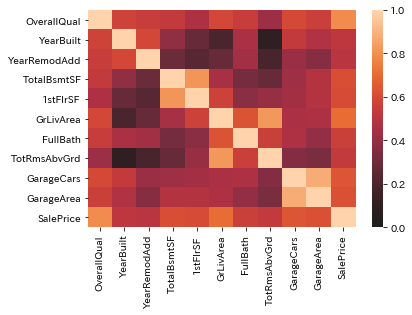

In [26]:
# ヒートマップ化
sns.heatmap(df_corr_10, vmax=1, vmin=0, center=0)
plt.show();

- 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。<br>
OverallQual: 家の評価１０段階<br>
YearBuilt: 建築した年<br>
YearRemodAdd: 改築した年<br>
TotalBsmtSF：地下室の平米<br>
1stFlrSF：　1階の平米<br>
GrLivArea：リビングの平米<br>
FullBath：浴室の個数<br>
TotRmsAbvGrd：　客室の数<br>
GarageCars：　ガレージに入れられる車の数<br>
GarageArea：　ガレージの大きさ<br>


- 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

In [27]:
df_corr_10

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
OverallQual,1.000000,0.572323,0.550684,0.537808,0.476224,0.593007,0.550600,0.427452,0.600671,0.562022,0.790982
YearBuilt,0.572323,1.000000,0.592855,0.391452,0.281986,0.199010,0.468271,0.095589,0.537850,0.478954,0.522897
YearRemodAdd,0.550684,0.592855,1.000000,0.291066,0.240379,0.287389,0.439046,0.191740,0.420622,0.371600,0.507101
TotalBsmtSF,0.537808,0.391452,0.291066,1.000000,0.819530,0.454868,0.323722,0.285573,0.434585,0.486665,0.613581
1stFlrSF,0.476224,0.281986,0.240379,0.819530,1.000000,0.566024,0.380637,0.409516,0.439317,0.489782,0.605852
GrLivArea,0.593007,0.199010,0.287389,0.454868,0.566024,1.000000,0.630012,0.825489,0.467247,0.468997,0.708624
FullBath,0.550600,0.468271,0.439046,0.323722,0.380637,0.630012,1.000000,0.554784,0.469672,0.405656,0.560664
TotRmsAbvGrd,0.427452,0.095589,0.191740,0.285573,0.409516,0.825489,0.554784,1.000000,0.362289,0.337822,0.533723
GarageCars,0.600671,0.537850,0.420622,0.434585,0.439317,0.467247,0.469672,0.362289,1.000000,0.882475,0.640409
GarageArea,0.562022,0.478954,0.371600,0.486665,0.489782,0.468997,0.405656,0.337822,0.882475,1.000000,0.623431


In [76]:
df_corr_3 = df_corr_10[(df_corr_10[:10] >= 0.8) & (df_corr_10[:10] != 1)]
df_corr_3

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
OverallQual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalBsmtSF,NaN,NaN,NaN,NaN,0.81953,NaN,NaN,NaN,NaN,NaN,NaN
1stFlrSF,NaN,NaN,NaN,0.81953,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GrLivArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.825489,NaN,NaN,NaN
FullBath,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotRmsAbvGrd,NaN,NaN,NaN,NaN,NaN,0.825489,NaN,NaN,NaN,NaN,NaN
GarageCars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.882475,NaN
GarageArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.882475,NaN,NaN


各特徴量の相関係数が０.８を超える組み合わせは上記の表より、「TotalBsmtSF＊1stFlrSF」「GrLivArea＊TotRmsAbvGrd」「GarageCars＊GarageArea」の3つの組み合わせと判断できる。